### 1.Завантажити дані, вивести назви колонок і розмір датасета

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

df_heart = pd.read_csv('heart.csv')

print("Назви колонок:")
for i in df_heart.columns:
    print(i)
print("Розмір датасету:",df_heart.shape[0])


Назви колонок:
HeartDisease
BMI
Smoking
AlcoholDrinking
Stroke
PhysicalHealth
MentalHealth
DiffWalking
Sex
AgeCategory
Race
Diabetic
PhysicalActivity
GenHealth
SleepTime
Asthma
KidneyDisease
SkinCancer
Розмір датасету: 319795


In [133]:
print("Пропуски у даних:\n", df_heart.isnull().sum())

Пропуски у даних:
 HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


In [134]:
binary_columns = ""



genHealth = [ 'Poor',  'Fair', 'Good', 'Very good', 'Excellent']
sex = ['Male','Female']
ageCategory =  {'18-24',  '25-29','30-34', '35-39', '40-44', '45-49', '50-54','55-59', '60-64','65-69', '70-74', '75-79',  '80 or older'}
race =  ['White', 'Hispanic', 'Other', 'American Indian/Alaskan Native', 'Black', 'Asian']
diabetic =  ['No', 'No, borderline diabetes',  'Yes',  'Yes (during pregnancy)']
bolean = ['No','Yes']

binary_columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 
                  'DiffWalking', 'PhysicalActivity', 'Asthma', 
                  'KidneyDisease', 'SkinCancer']

df_heart[binary_columns] = df_heart[binary_columns].apply(lambda x: x.map({'Yes': 1, 'No': 0}))


df_heart['GenHealth'] = pd.Categorical(df_heart['GenHealth'], categories=genHealth, ordered=True)
df_heart['GenHealth'] = df_heart['GenHealth'].cat.codes

df_heart['Sex'] = pd.Categorical(df_heart['Sex'], categories=sex, ordered=True)
df_heart['Sex'] = df_heart['Sex'].cat.codes

df_heart['AgeCategory'] = pd.Categorical(df_heart['AgeCategory'], categories=ageCategory, ordered=True)
df_heart['AgeCategory'] = df_heart['AgeCategory'].cat.codes

df_heart['Race'] = pd.Categorical(df_heart['Race'], categories=race, ordered=True)
df_heart['Race'] = df_heart['Race'].cat.codes

df_heart['Diabetic'] = pd.Categorical(df_heart['Diabetic'], categories=diabetic, ordered=True)
df_heart['Diabetic'] = df_heart['Diabetic'].cat.codes


print(df_heart)


        HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0                  0  16.60        1                0       0             3.0   
1                  0  20.34        0                0       1             0.0   
2                  0  26.58        1                0       0            20.0   
3                  0  24.21        0                0       0             0.0   
4                  0  23.71        0                0       0            28.0   
...              ...    ...      ...              ...     ...             ...   
319790             1  27.41        1                0       0             7.0   
319791             0  29.84        1                0       0             0.0   
319792             0  24.24        0                0       0             0.0   
319793             0  32.81        0                0       0             0.0   
319794             0  46.56        0                0       0             0.0   

        MentalHealth  DiffW

<p align="center"> <font size="5">Візуалізація даних</font></p>

<p align="center"> <font size="4">Heatmap</font></p>

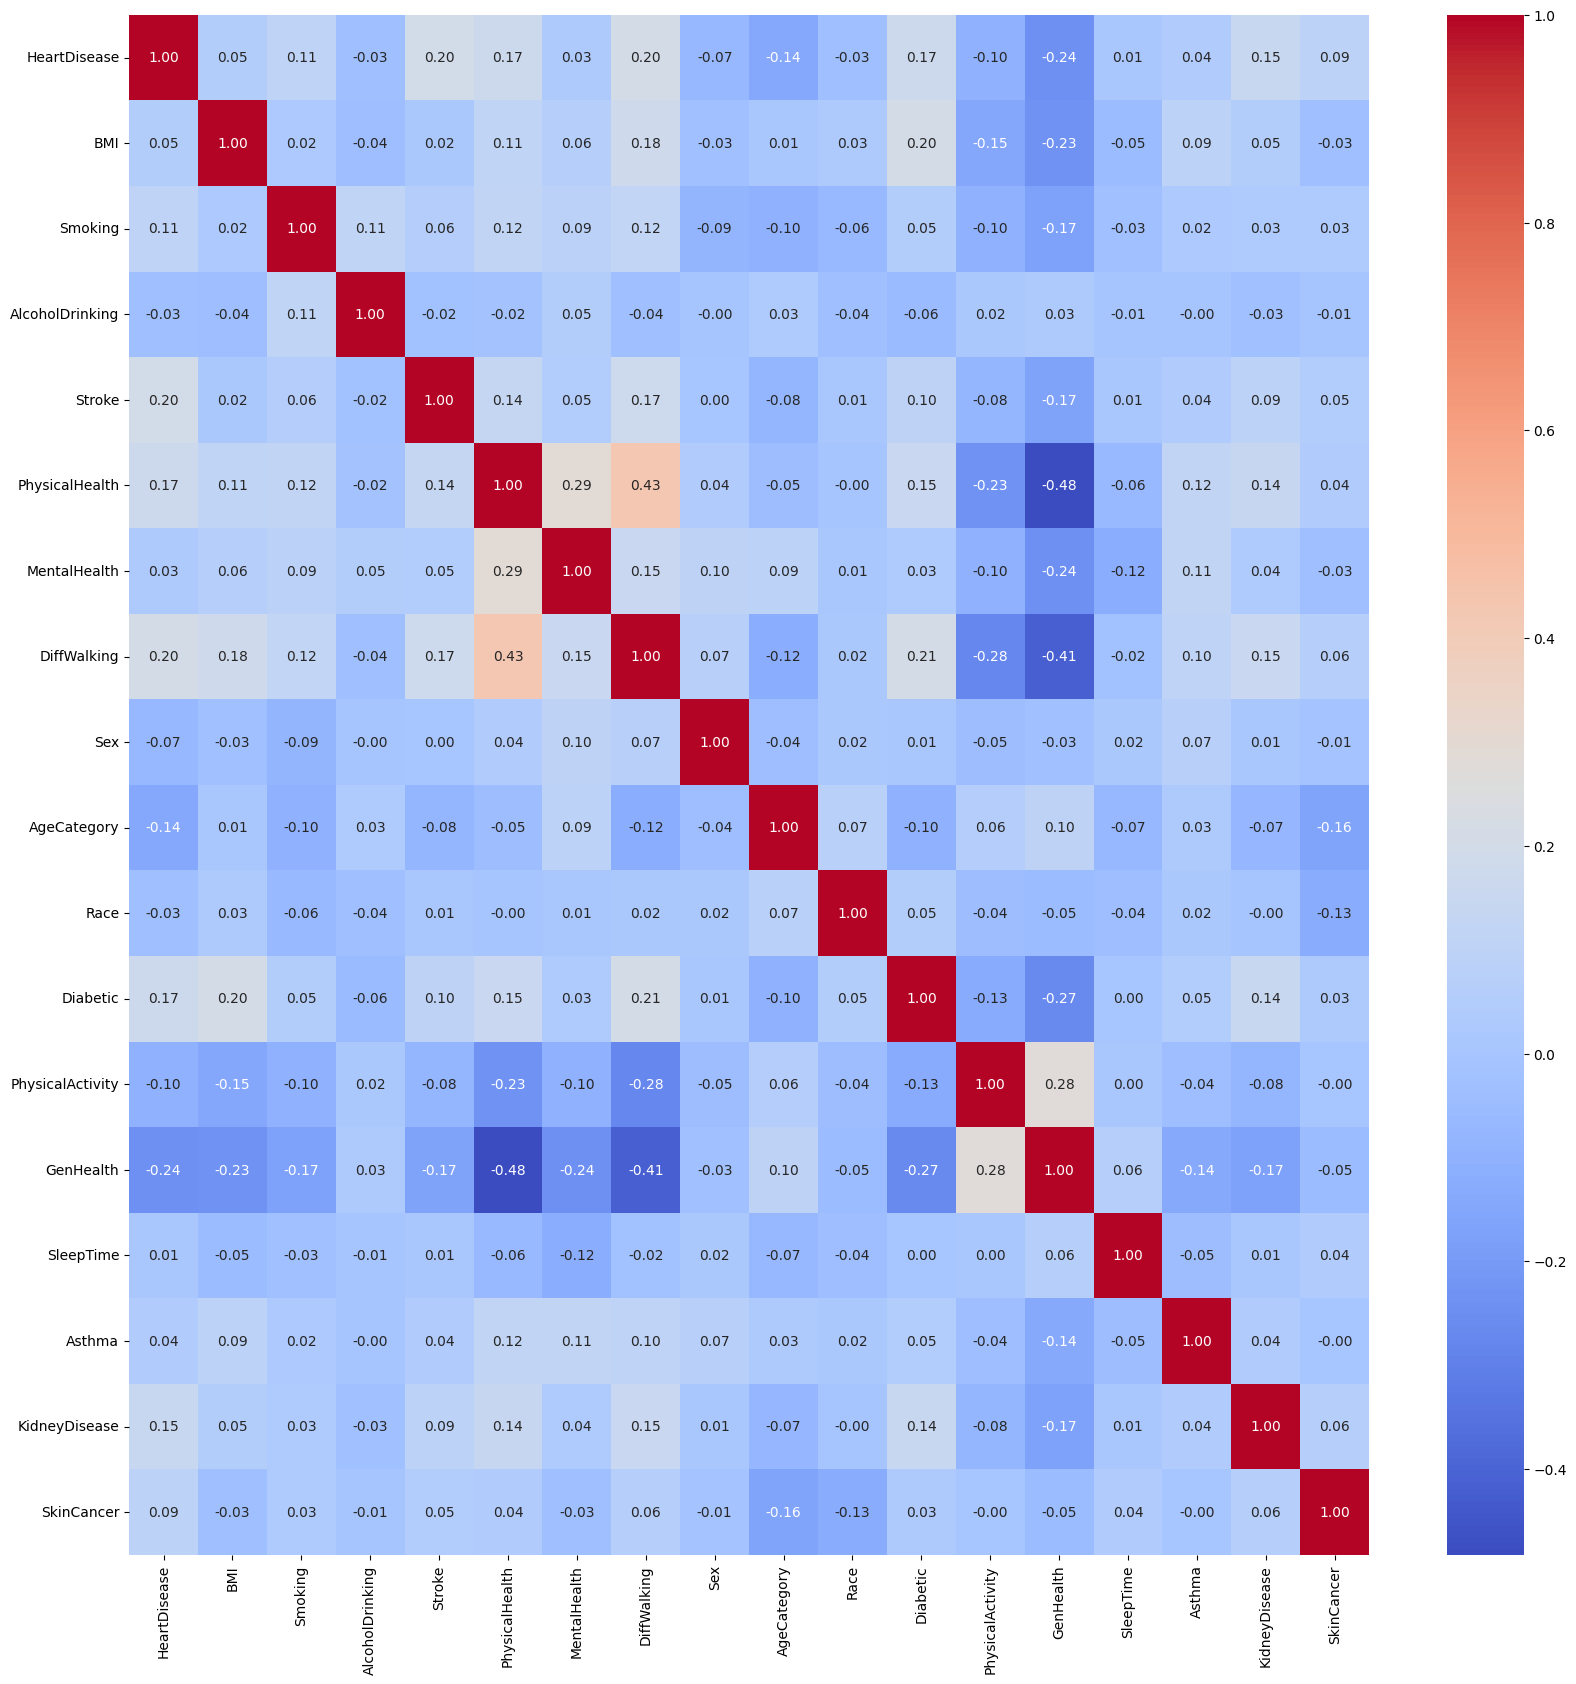

In [135]:
corr = df_heart.corr()
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr,  cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

<p align="center"> <font size="4">Histogram</font></p>

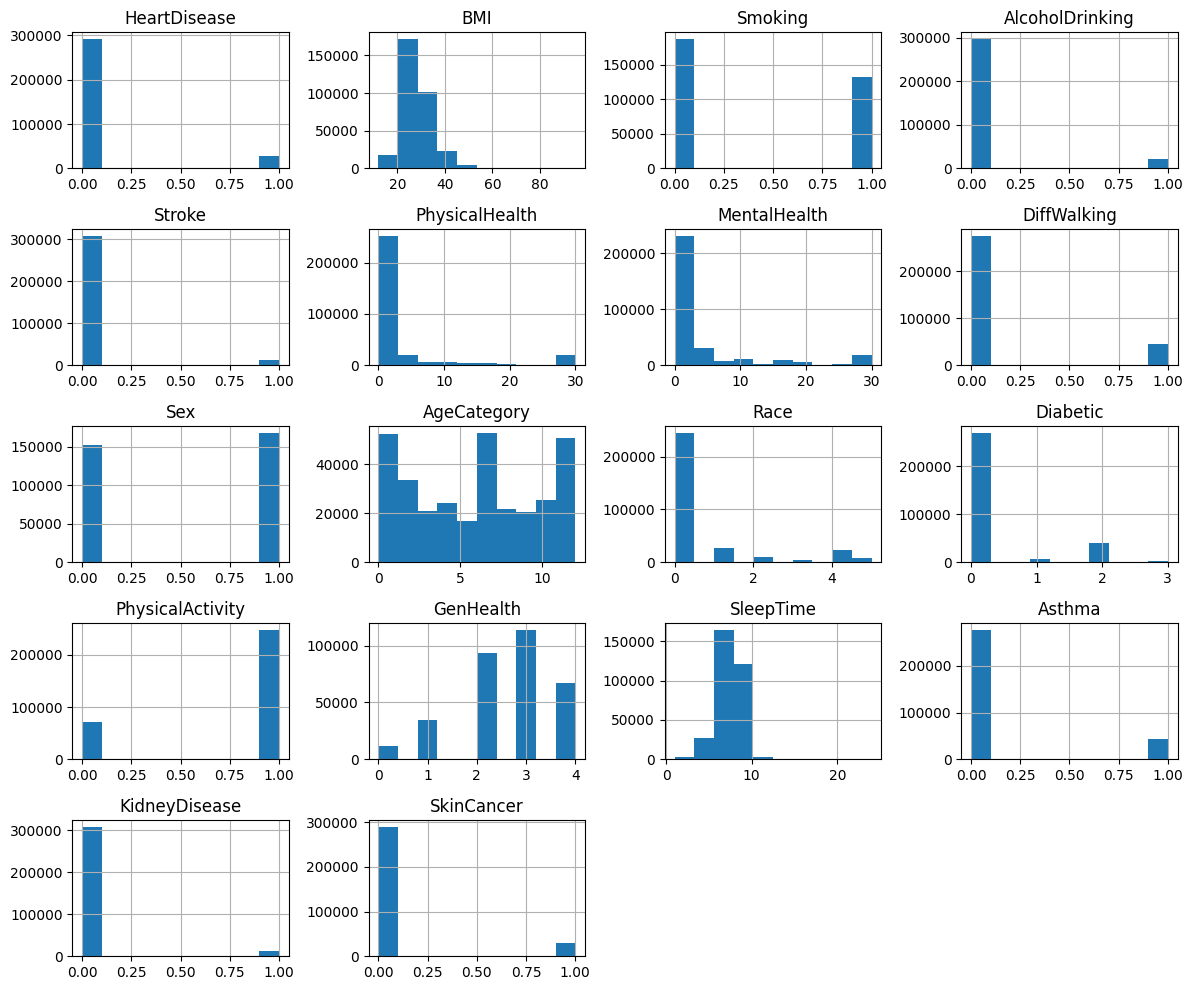

In [136]:
df_heart.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

<p align="center"> <font size="4">Boxplot</font></p>

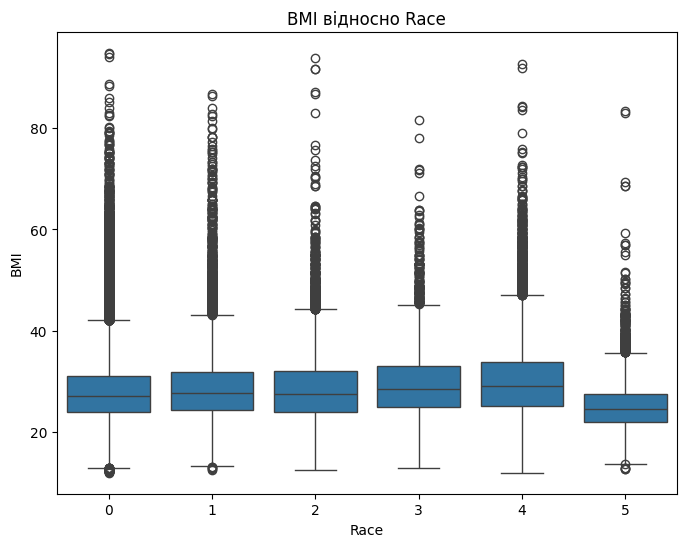

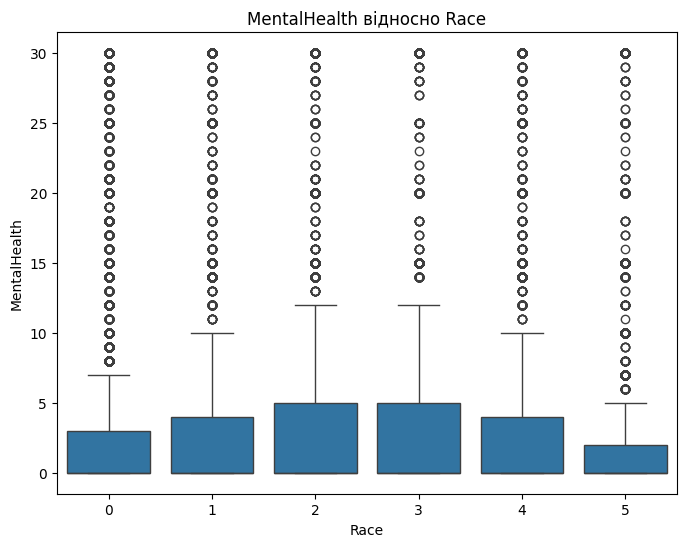

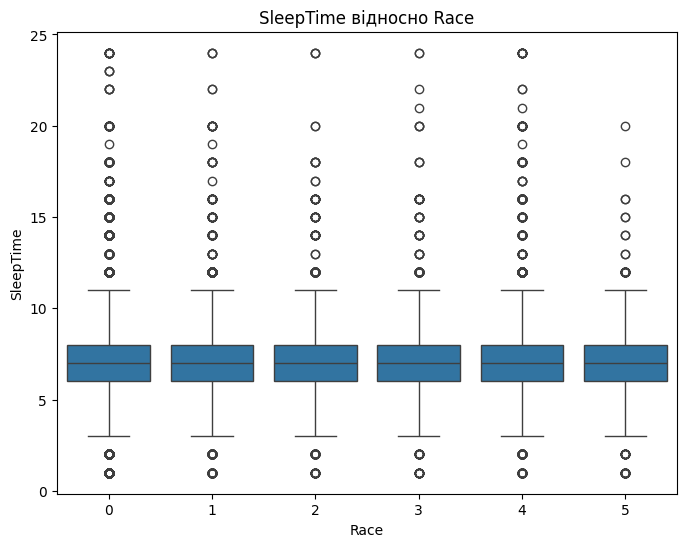

In [137]:
target = 'Race'
features = ['BMI', 'MentalHealth', 'SleepTime']  # Заміни на власні назви колонок

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_heart[target], y=df_heart[feature])
    plt.title(f'{feature} відносно {target}')
    plt.show()